(C:digital-images:color-models)=
# Color models

<!-- Rajouter YCbCr ?-->

A _color model_, or _color space_, is a mean to represent colors as points within a specific space.
Several color models exist, some with multiple variations.
This section focuses on the most common color spaces.

(C:digital-images:rgb-color-model)=
## The RGB color model

```{margin}
A "dual" color model is the CMY (cyan, magenta, yellow) color model.
It is not designed to be used in image processing but rather for color printing since adding pigments on a white surface removes light:
this explained why it uses subtractive color mixing rather than additive color mixing.
```

The RGB (red, green, blue) color model uses additive color mixing,
where every colors can be made by combining primary colors (red, green, blue) with the appropriate intensity
({numref}`F:digital-images:additive-mixing`).
The RGB color model is used by screens, and, as a consequence, ubiquitous in image processing.

```{figure} additive-mixing.svg
---
name: F:digital-images:additive-mixing
width: 30%
---
Additive color mixing.
```

The RGB model is based on a 3D Cartesian coordinate system, as seen below.
By convention, the values $R$, $G$ and $B$ are assumed to be in $[0,1]$.
Nevertheless, digital images are generally quantized on 8 bits per band,
thus giving values $R$, $G$, and $B$ to lie on $2^8=256$ values in $\{0,\dots,255\}$.
Therefore a total of $256^3=16\,777\,216$ colors can be generated.

```{figure} model-rgb.svg
---
name: F:digital-images:rgb
width: 60%
---
The RGB color space.
```

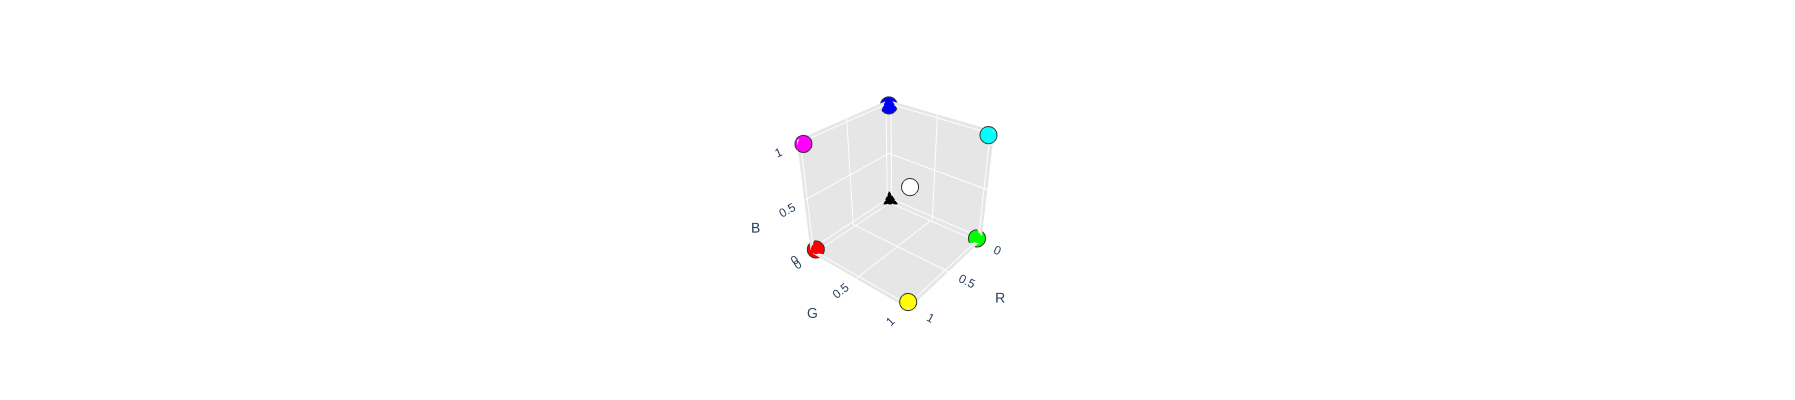

In [1]:
import numpy as np
from myst_nb import glue
import plotly.graph_objs as go

v = np.arange(0,1.5,1)
r, g, b = np.meshgrid(v, v, v)
r = r.flatten()
g = g.flatten()
b = b.flatten()

color = []
for i in range(len(r)):
    R, G, B = 255*r[i], 255*g[i], 255*b[i]
    clr = f"rgba({R},{G},{B},1)"
    color.append(clr)

trace = go.Scatter3d(
    x=r, y=g, z=b,
    mode='markers',
    marker=dict(
        size=10,
        color=color,
        line=dict(width=1, color="#333")
    ),
    hovertemplate="RGB = (%{x}, %{y}, %{z})",
    name=""
)

data = [trace]
layout = go.Layout(
    height=400,
    width=400,
    margin=dict(l=10, r=10, b=10, t=0),
    scene_camera=dict(
        eye=dict(x=1.5, y=1.2, z=1.2),
    ),
    scene = dict(
        xaxis_title='R',
        xaxis=dict(nticks=3,spikesides=False,backgroundcolor="rgba(0,0,0,0.1)"),
        yaxis_title='G',
        yaxis=dict(nticks=3,spikesides=False,backgroundcolor="rgba(0,0,0,0.1)"),
        zaxis_title='B',
        zaxis=dict(nticks=3,spikesides=False,backgroundcolor="rgba(0,0,0,0.1)"),
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

<!-- ## The CMY color model

```{margin}
In practive, combining the three primary colors C, M, Y for printing produces a muddy-looking black.
Thus, black is often added as a fourth color to produce deep black, giving rise to the CMYK color model (K meaning black).
```

The CMY (cyan, magenta, yellow) color model uses subtractive color mixing
({numref}`F:digital-images:subtractive-mixing`).
The CMY color model is used for color printing,
which is a subtractive color system since adding pigments on a white surface removes light.
It is rarely used in image processing.

```{figure} subtractive-mixing.svg
---
name: F:digital-images:subtractive-mixing
width: 30%
---
Subtractive color mixing.
```

The conversion from RGB color model to CMY color model is performed using the following simple operation,
assuming the six coordinates to be in the range $[0,1]$:

$$
  C &= 1 - R, \\
  M &= 1 - G, \\
  Y &= 1 - B. \\
$$ -->

## The HSV color model

The RGB and CMY models do not directly relate to the human sense of color.
Instead, the HSV (hue, saturation, value) color model corresponds closely with the way humans describe and interpret color.
Indeed, hue corresponds to the type of color (such as orange, cyan or blue),
saturation corresponds to the purity of color,
and value corresponds to the brightness.
In addition to this, the HSV model has the advantage to extract the grayscale information from a color image thanks to the value band,
making it suitable for some grayscale techniques.

The HSV color model is represented by the cylinder, as seen below.

```{figure} model-hsv.svg
---
name: F:digital-images:hsv
width: 75%
---
The HSV color space.
```

The conversion from RGB color model to HSV color model is performed using the following operations,
assuming that the RGB values have been normalised in the range $[0,1]$, hue is in the range $[0,360^{\circ}]$, saturation and value are in the range $[0,1]$:

$$
  H &= H' \,\mathrm{mod}\, 360
  \quad\text{where}\quad
  H' &=
  \begin{cases}
    60 \, (G - B)/\delta               &\text{if } R=V, \\
    60 \, (B - R)/\delta + 120 &\text{if } G=V, \\
    60 \, (R - G)/\delta + 240 &\text{if } B=V, \\
  \end{cases}\\
  S &= \frac{\delta}{V}, \\
  V &= \mathrm{max}(R, G, B),
$$
with $\delta = \mathrm{max}(R, G, B) - \mathrm{min}(R, G, B)$.

The HSV color model has not to be confused with
the HSI (hue, saturation, intensity) and HSL (hue, saturation, luminance) color models
which mainly differ from the HSV color model in the third band.

## A color generator

Below you can use the sliders to combine the different bands of the previous color models,
and perceive the effect on the color.

<div id="color-generator">
  <div class="box" id="droplet">
  </div>
  <div class="box">
    <span class="label">R:</span><input type="range" min="0" max="255" value="0" id="RSliderx"><br>
    <span class="label">G:</span><input type="range" min="0" max="255" value="0" id="GSliderx"><br>
    <span class="label">B:</span><input type="range" min="0" max="255" value="0" id="BSliderx"><br>
    <p id="rgb-code" class="code"></p>
  </div>
  <div class="box">
    <span class="label">H:</span><input type="range" min="0" max="359" value="0" id="HSliderx"><br>
    <span class="label">S:</span><input type="range" min="0" max="100" value="0" id="SSliderx"><br>
    <span class="label">V:</span><input type="range" min="0" max="100" value="0" id="VSliderx"><br>
    <p id="hsv-code" class="code"></p>
  </div>
</div>

<style>
  input { width:200px; }
  .box { margin:10px; }
  .label { display: inline-block; width:30px; }
  .code { margin: 5px 0; }
  #droplet {width: 100px; height: 100px; border: 1px solid black;}
  #color-generator {
    display: flex;
    justify-content: center;
    align-items: top;
  }
  @media (max-width: 700px) {
    #color-generator {
      flex-direction:column;
    }
  }
</style>

<script>

    const RSlider = document.getElementById('RSliderx');
    const GSlider = document.getElementById('GSliderx');
    const BSlider = document.getElementById('BSliderx');
    const RGBCode = document.getElementById('rgb-code');
    const HSlider = document.getElementById('HSliderx');
    const SSlider = document.getElementById('SSliderx');
    const VSlider = document.getElementById('VSliderx');
    const HSVCode = document.getElementById('hsv-code');
    const Droplet = document.getElementById('droplet');

    function update(R, G, B, H, S, V)
    {
      // Update controls

      // Convert to int
      R = parseInt(R);
      G = parseInt(G);
      B = parseInt(B);
      H = parseInt(H);
      S = parseInt(S);
      V = parseInt(V);

      // Droplet color
      Droplet.style.backgroundColor = `rgb(${R}, ${G}, ${B})`;

      // Codes
      RGBCode.innerText = `RGB = (${R}, ${G}, ${B})`;
      HSVCode.innerText = `HSV = (${H}, ${S}, ${V})`;
    }

    function updateRGBColor()
    {
      // Convert color (RGB -> HSV and update controls

      // Read sliders
      const R = parseInt(RSlider.value);
      const G = parseInt(GSlider.value);
      const B = parseInt(BSlider.value);

      // Conversion
      const [H, S, V] = rgb2hsv(R, G, B);

      // Update HSV sliders
      HSlider.value = H;
      SSlider.value = S;
      VSlider.value = V;

      // Update controls
      update(R, G, B, H, S, V);
    }

    function updateHSVColor()
    {
      // Convert color (HSV -> RGB and update controls

      // Read sliders
      const H = parseInt(HSlider.value);
      const S = parseInt(SSlider.value);
      const V = parseInt(VSlider.value);

      // Conversion
      const [R, G, B] = hsv2rgb(H, S, V);

      // Update HSV sliders
      RSlider.value = R;
      GSlider.value = G;
      BSlider.value = B;

      // Update controls
      update(R, G, B, H, S, V);
    }

    function rgb2hsv(R, G, B)
    {
      // RGB to HSV
      // Source : https://github.com/scikit-image/scikit-image/blob/v0.22.0/skimage/color/colorconv.py#L242-L329

      let r = R/255;
      let g = G/255;
      let b = B/255;

      let v = Math.max(r,g,b);

      let delta = Math.max(r,g,b) - Math.min(r,g,b);

      let s;
      if (v==0) {
        s = 0;
      } else {
        s = delta/v;
      }

      let  h;
      if (r == v) { h = 60 * (g - b) / delta; console.log(1); }
      if (g == v) { h = 60 * (b - r) / delta + 120; console.log(2); }
      if (b == v) { h = 60 * (r - g) / delta + 240; console.log(3); }
      if (delta == 0) { h = 0; }
      h = (360+h) % 360;

      return [h, s*100, v*100];
    }

    function hsv2rgb(H, S, V)
    {
      // HSV to RGB
      // Source : https://github.com/scikit-image/scikit-image/blob/v0.22.0/skimage/color/colorconv.py#L332-L392

      let s = S / 100;
      let v = V / 100;
      let hi = Math.floor(H/60);
      let f = H/60 - hi;
      let p = v * (1 - s);
      let q = v * (1 - f * s);
      let t = v * (1 - (1 - f) * s);

      let r, g, b;
      if ((0<=hi) && (hi<1)) {r = v; g = t; b = p; }
      if ((1<=hi) && (hi<2)) {r = q; g = v; b = p; }
      if ((2<=hi) && (hi<3)) {r = p; g = v; b = t; }
      if ((3<=hi) && (hi<4)) {r = p; g = q; b = v; }
      if ((4<=hi) && (hi<5)) {r = t; g = p; b = v; }
      if ((5<=hi) && (hi<6)) {r = v; g = p; b = q; }

      return [r*255, g*255, b*255];
    }

    // Events on sliders
    RSlider.addEventListener('input', updateRGBColor);
    GSlider.addEventListener('input', updateRGBColor);
    BSlider.addEventListener('input', updateRGBColor);
    HSlider.addEventListener('input', updateHSVColor);
    SSlider.addEventListener('input', updateHSVColor);
    VSlider.addEventListener('input', updateHSVColor);

    // Initial update
    updateRGBColor();

</script>
